In [54]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from keras.layers import Softmax as softmax
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [92]:
data = pd.read_csv(r"C:\Users\ckb24101\OneDrive - University of Strathclyde\Desktop\FO_Consumption_Data.csv")

data = data.drop(columns=['Time'])
pd1 = data.iloc[:,32:41]
pd2 = data.iloc[:,-5:]
data = pd.concat([pd1,pd2], axis=1)
data.to_csv("Tanker_Data.csv")
data

,DG1 FOC (ISEMMS),DG1 kWh (ISEMMS),DG1 LO INLET PRESS AMS (ISEMMS),DG1 LO INLET TEMP AMS (ISEMMS),DG1 Power kW (ISEMMS),DG1 TC EXH GAS INLET TEMP AMS (ISEMMS),DG1 WINDING TEMP R PHASE AMS (ISEMMS),DG1 WINDING TEMP S PHASE AMS (ISEMMS),DG1 WINDING TEMP T PHASE AMS (ISEMMS),True Ship Heading (ISEMMS),Water Depth (ISEMMS),Wind Beaufort (ISEMMS),Wind Direction (ISEMMS),Wind Speed (ISEMMS)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.02,4.74,4.3,62.9,284.25,451.7,55.1,56.2,54.8,100.81,NaN,6.0,134.0,10.80
2,2.00,4.65,4.3,62.8,278.79,451.7,52.7,54.6,53.7,100.20,NaN,4.0,129.0,7.20
3,2.03,4.64,4.3,62.8,278.35,447.8,54.2,55.3,56.1,99.92,NaN,4.0,134.0,7.72
4,2.04,4.78,4.3,62.8,286.63,447.8,54.6,57.3,54.3,99.84,NaN,4.0,135.0,7.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41755,0.00,0.00,0.4,66.6,0.00,270.7,47.5,49.5,48.1,76.79,NaN,8.0,345.0,17.49
41756,NaN,0.00,0.4,66.6,0.00,267.3,47.5,49.2,47.8,75.98,NaN,8.0,342.0,17.49
41757,0.00,0.00,0.4,66.6,0.00,267.3,47.5,49.2,47.8,74.58,NaN,8.0,344.0,17.49
41758,NaN,0.00,0.4,66.6,0.00,264.1,47.5,49.2,47.8,74.65,NaN,7.0,347.0,16.98


In [57]:
data1 = pd.read_csv("Tanker_Data.csv")
#data1.drop(data1.columns[0], axis=1)
data1

,Unnamed: 0,DG1 FOC (ISEMMS),DG1 kWh (ISEMMS),DG1 LO INLET PRESS AMS (ISEMMS),DG1 LO INLET TEMP AMS (ISEMMS),DG1 Power kW (ISEMMS),DG1 TC EXH GAS INLET TEMP AMS (ISEMMS),DG1 WINDING TEMP R PHASE AMS (ISEMMS),DG1 WINDING TEMP S PHASE AMS (ISEMMS),DG1 WINDING TEMP T PHASE AMS (ISEMMS),True Ship Heading (ISEMMS),Water Depth (ISEMMS),Wind Beaufort (ISEMMS),Wind Direction (ISEMMS),Wind Speed (ISEMMS)
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2.02,4.74,4.3,62.9,284.25,451.7,55.1,56.2,54.8,100.81,NaN,6.0,134.0,10.80
2,2,2.00,4.65,4.3,62.8,278.79,451.7,52.7,54.6,53.7,100.20,NaN,4.0,129.0,7.20
3,3,2.03,4.64,4.3,62.8,278.35,447.8,54.2,55.3,56.1,99.92,NaN,4.0,134.0,7.72
4,4,2.04,4.78,4.3,62.8,286.63,447.8,54.6,57.3,54.3,99.84,NaN,4.0,135.0,7.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41755,41755,0.00,0.00,0.4,66.6,0.00,270.7,47.5,49.5,48.1,76.79,NaN,8.0,345.0,17.49
41756,41756,NaN,0.00,0.4,66.6,0.00,267.3,47.5,49.2,47.8,75.98,NaN,8.0,342.0,17.49
41757,41757,0.00,0.00,0.4,66.6,0.00,267.3,47.5,49.2,47.8,74.58,NaN,8.0,344.0,17.49
41758,41758,NaN,0.00,0.4,66.6,0.00,264.1,47.5,49.2,47.8,74.65,NaN,7.0,347.0,16.98


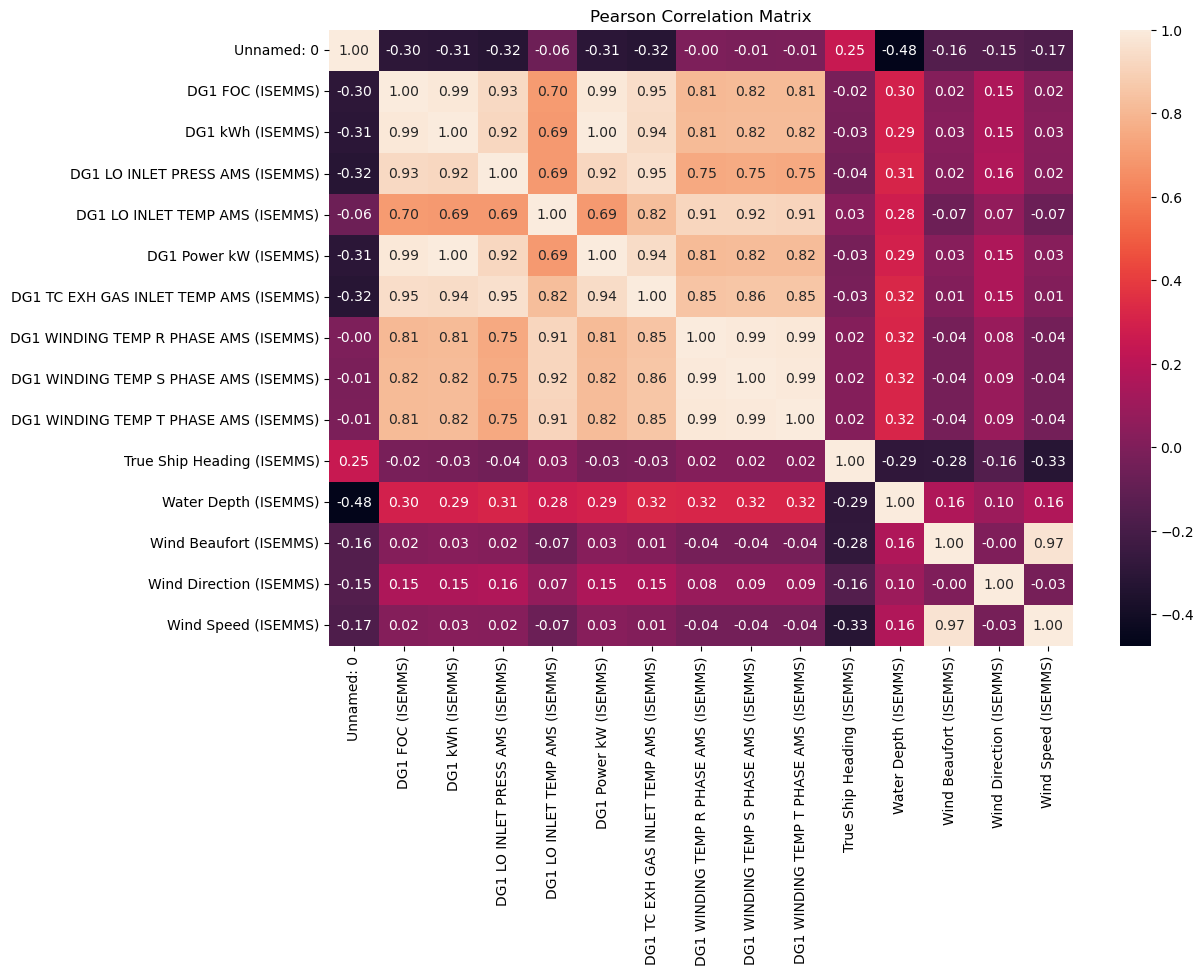

,Unnamed: 0,DG1 FOC (ISEMMS),DG1 kWh (ISEMMS),DG1 LO INLET PRESS AMS (ISEMMS),DG1 LO INLET TEMP AMS (ISEMMS),DG1 Power kW (ISEMMS),DG1 TC EXH GAS INLET TEMP AMS (ISEMMS),DG1 WINDING TEMP R PHASE AMS (ISEMMS),DG1 WINDING TEMP S PHASE AMS (ISEMMS),DG1 WINDING TEMP T PHASE AMS (ISEMMS),True Ship Heading (ISEMMS),Water Depth (ISEMMS),Wind Beaufort (ISEMMS),Wind Direction (ISEMMS),Wind Speed (ISEMMS)
0,-1.731989,1.097656,1.099579,1.116191,0.924602,1.098571,1.139505,1.477990,1.390396,1.431479,-0.644982,3.015482,0.986332,-0.458370,0.711833
1,-1.731906,1.097656,1.099579,1.116191,0.924602,1.098571,1.139505,1.477990,1.390396,1.431479,-0.644982,3.015482,0.986332,-0.458370,0.711833
2,-1.731823,1.078188,1.062350,1.116191,0.910395,1.060929,1.139505,1.199152,1.209526,1.299571,-0.653346,3.015482,0.162407,-0.499864,0.073931
3,-1.731740,1.107390,1.058214,1.116191,0.910395,1.057895,1.118475,1.373426,1.288657,1.587370,-0.657186,3.015482,0.162407,-0.458370,0.166072
4,-1.731657,1.117124,1.116125,1.116191,0.910395,1.114980,1.118475,1.419899,1.514744,1.371521,-0.658283,3.015482,0.162407,-0.450071,0.073931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41755,1.731657,-0.868586,-0.861117,-1.026688,1.450267,-0.861115,0.163516,0.595004,0.633004,0.628042,-0.974367,-0.351383,1.810256,1.292663,1.897266
41756,1.731740,-0.868586,-0.861117,-1.026688,1.450267,-0.861115,0.145182,0.595004,0.599090,0.592068,-0.985474,-0.351383,1.810256,1.267767,1.897266
41757,1.731823,-0.868586,-0.861117,-1.026688,1.450267,-0.861115,0.145182,0.595004,0.599090,0.592068,-1.004672,-0.351383,1.810256,1.284365,1.897266
41758,1.731906,-0.868586,-0.861117,-1.026688,1.450267,-0.861115,0.127927,0.595004,0.599090,0.592068,-1.003712,-0.351383,1.398294,1.309261,1.806897


In [59]:
# Univariate Data imputation - Forward and backward filling
imputed_data = data1.ffill(axis=0).bfill(axis=0)

# Feature selection: Correlation analysis
data_corr = imputed_data.corr(method='pearson')
#print(data_corr)

# Heatmap for the Pearson correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data_corr, annot=True, fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

# Feature standardisation
scaled_data = (imputed_data - imputed_data.mean())/imputed_data.std()
scaled_data

In [87]:
# Selecting relevant features
selected_data = scaled_data.iloc[:,:10]

# Separating features and target variables
X = selected_data.drop(columns = ['DG1 FOC (ISEMMS)'])
y = selected_data['DG1 FOC (ISEMMS)']

print('Shapes:',X.shape,y.shape)

# Splitting dataset into training and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=42,
                                                   ) 



Shapes: (41760, 9) (41760,)


(33408,)

Mean Absolute Error: 0.05708224657318993, Mean Squared Error: 0.02051109472980879


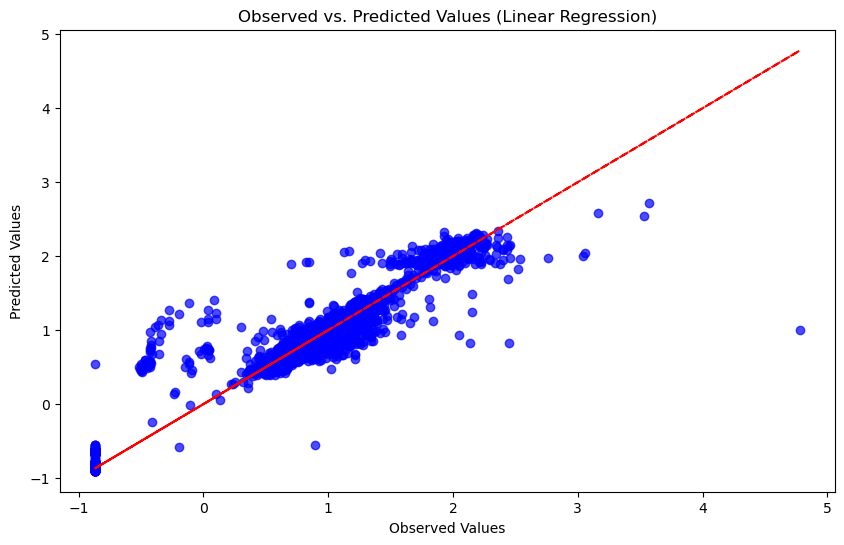

In [91]:
# Fit and make predictions for model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Check performance of model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}, Mean Squared Error: {mse}")

# Plotting Observed vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot(np.sort(y_test), np.sort(y_test), color='red', linestyle='--')
plt.title('Observed vs. Predicted Values (Linear Regression)')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
#plt.axline((0, 0), slope=1, color='red', linestyle='--') 
plt.show()